In [26]:
import yfinance as yf

# 가져올 심볼
nasdaq = yf.Ticker("^IXIC")
sp500 = yf.Ticker("^GSPC")

# 기간 설정 (예: 최근 1년)
nasdaq_hist = nasdaq.history(period="20y")
sp500_hist = sp500.history(period="20y")

nasdaq_hist = nasdaq_hist.reset_index()
nasdaq_hist.rename(columns={'Date': 'date'}, inplace=True)

sp500_hist = sp500_hist.reset_index()
sp500_hist.rename(columns={'Date': 'date'}, inplace=True)

In [ ]:
import pandas as pd

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


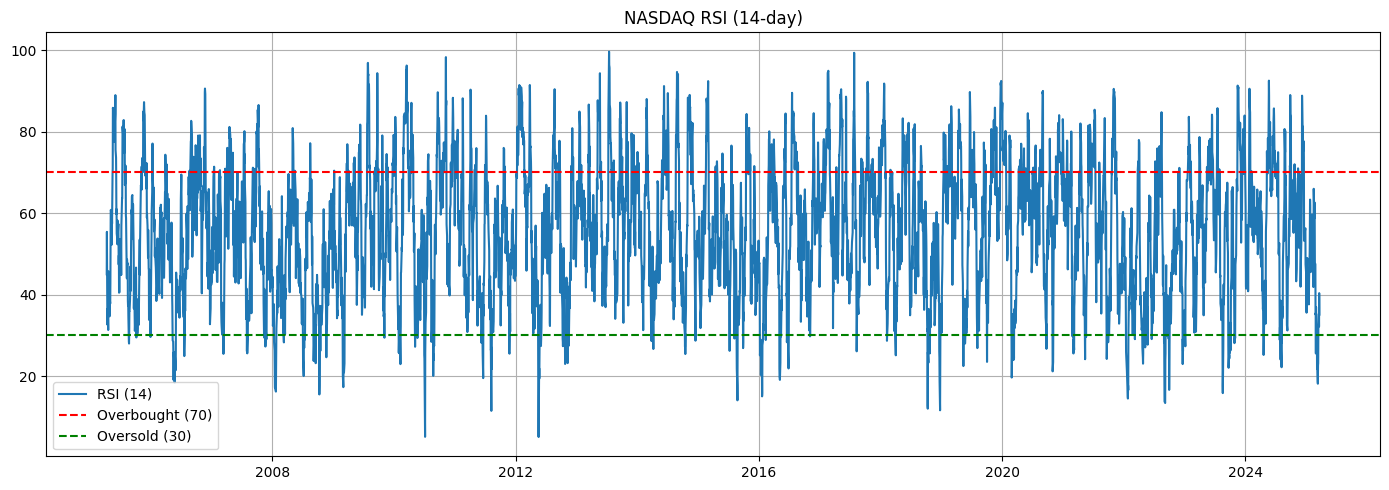

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

nasdaq_hist['MA_200'] = nasdaq_hist['Close'].rolling(window=200).mean()
close = nasdaq_hist['Close']

# MDD 계산
cum_max = close.cummax()
drawdown = (close - cum_max) / cum_max
nasdaq_hist['MDD'] = drawdown

# RSI 계산 (14일 기준)
nasdaq_hist['RSI'] = compute_rsi(close)

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(nasdaq_hist['RSI'], label='RSI (14)')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('NASDAQ RSI (14-day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()